# Linear Regression for all the 3 stocks based on User selection.


The data taken here is a complete set with tweet info

In [1]:
import pandas_datareader as pdr
import pandas as pd 
import datetime
import pandas_ta

In [2]:
#!pip install pandas_ta

In [3]:
print ("Enter one of these values from doge / tesla/ twitter")
selected_value = input()

Enter one of these values from doge / tesla/ twitter
tesla


In [4]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [5]:
#Fetch Tweets and Sentiment data - Join from Tweet and Sentiment tables
try:
    df_Stock = SqlConn.fetchFinanceData(selected_value)
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [6]:
selected_value

'tesla'

In [7]:
df_Stock

,financeType,date,open,high,low,close,adjustedClose,volume,id
0,tesla,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,1
1,tesla,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2
2,tesla,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,3
3,tesla,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,4
4,tesla,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,5
...,...,...,...,...,...,...,...,...,...
3025,tesla,2022-07-06,692.340027,703.690002,681.559998,695.200012,695.200012,23951200,3026
3026,tesla,2022-07-07,701.760010,736.090027,696.630005,733.630005,733.630005,27310200,3027
3027,tesla,2022-07-08,727.000000,764.940002,723.479980,752.289978,752.289978,33343700,3028
3028,tesla,2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400,3029


In [8]:
df_Stock["date"] = pd.to_datetime(df_Stock["date"])
df_Stock.set_index("date", inplace=True)
df_Stock.drop("financeType",axis=1,inplace=True)
df_Stock

,open,high,low,close,adjustedClose,volume,id
date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,1
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,3
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,4
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,5
...,...,...,...,...,...,...,...
2022-07-06,692.340027,703.690002,681.559998,695.200012,695.200012,23951200,3026
2022-07-07,701.760010,736.090027,696.630005,733.630005,733.630005,27310200,3027
2022-07-08,727.000000,764.940002,723.479980,752.289978,752.289978,33343700,3028


In [9]:
df_AdjustedClose = df_Stock[['adjustedClose']]


In [10]:
df_AdjustedClose

,adjustedClose
date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-07-06,695.200012
2022-07-07,733.630005
2022-07-08,752.289978


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3030 entries, 2010-06-29 to 2022-07-12
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adjustedClose  3030 non-null   float64
dtypes: float64(1)
memory usage: 47.3 KB
None


<AxesSubplot:xlabel='date'>

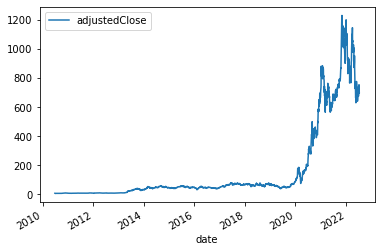

In [11]:
print(df_AdjustedClose.info())
df_AdjustedClose.plot()

In [12]:
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df_AdjustedClose.ta.ema(close='adjustedClose', length=10, append=True)

C:\Users\15125\AppData\Local\Temp/ipykernel_25800/668832598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjustedClose.ta.ema(close='adjustedClose', length=10, append=True)


date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2022-07-06    694.967781
2022-07-07    701.997277
2022-07-08    711.141404
2022-07-11    709.666609
2022-07-12    707.765411
Name: EMA_10, Length: 3030, dtype: float64

In [13]:
# Print the first 20 entries of our data
df_AdjustedClose.head(20)

,adjustedClose,EMA_10
date,,
2010-06-29,4.778,NaN
2010-06-30,4.766,NaN
2010-07-01,4.392,NaN
2010-07-02,3.840,NaN
2010-07-06,3.222,NaN
2010-07-07,3.160,NaN
2010-07-08,3.492,NaN
2010-07-09,3.480,NaN
2010-07-12,3.410,NaN


In [14]:
# Drop the first n-rows
df_AdjustedClose.dropna(inplace=True)
# View our newly-formed dataset
df_AdjustedClose.head(10)

C:\Users\15125\AppData\Local\Temp/ipykernel_25800/1199575657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjustedClose.dropna(inplace=True)


,adjustedClose,EMA_10
date,,
2010-07-13,3.628,3.816800
2010-07-14,3.968,3.844291
2010-07-15,3.978,3.868602
2010-07-16,4.128,3.915765
2010-07-19,4.382,4.000535
2010-07-20,4.060,4.011347
2010-07-21,4.044,4.017284
2010-07-22,4.200,4.050505
2010-07-23,4.258,4.088231


<AxesSubplot:xlabel='date'>

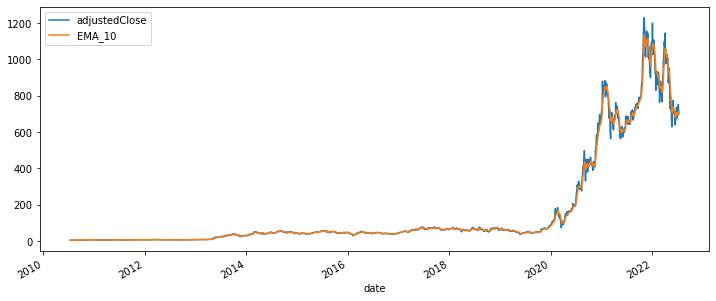

In [15]:
df_AdjustedClose.plot(figsize=(12,5))

In [16]:
 from sklearn.model_selection import train_test_split

In [17]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_AdjustedClose[['adjustedClose']], df_AdjustedClose[['EMA_10']], test_size=.3)
# Test set
print(X_test.describe())

       adjustedClose
count     907.000000
mean      150.309067
std       266.626544
min         3.628000
25%         7.962000
50%        47.698002
75%        69.477997
max      1229.910034


In [18]:
# Training set
print(X_train.describe())

       adjustedClose
count    2114.000000
mean      158.431688
std       271.695132
min         3.520000
25%        28.407500
50%        47.553999
75%        69.823502
max      1222.089966


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)


Model Coefficients: [[0.9920164]]
Mean Absolute Error: 6.240351706438461
Coefficient of Determination: 0.9961490561187679
Intercept: [0.16470899]


In [21]:
dfpred = pd.DataFrame(y_pred)
dfpred.columns=["y_pred"]
dfpred

,y_pred
0,71.530371
1,922.739961
2,51.487669
3,42.757926
4,43.240046
...,...
902,27.814190
903,36.071734
904,43.238059
905,40.688577


In [22]:
y_test

,EMA_10
date,
2018-12-04,69.824190
2022-01-24,1004.133508
2014-11-14,49.356189
2016-12-29,42.034644
2015-02-20,42.079270
...,...
2013-08-14,28.411466
2013-10-04,36.393043
2019-06-11,40.739389


In [23]:
df_trend = y_test.copy()
df_trend["y_pred"]=y_pred
df_trend

,EMA_10,y_pred
date,,
2018-12-04,69.824190,71.530371
2022-01-24,1004.133508,922.739961
2014-11-14,49.356189,51.487669
2016-12-29,42.034644,42.757926
2015-02-20,42.079270,43.240046
...,...,...
2013-08-14,28.411466,27.814190
2013-10-04,36.393043,36.071734
2019-06-11,40.739389,43.238059


<AxesSubplot:xlabel='date'>

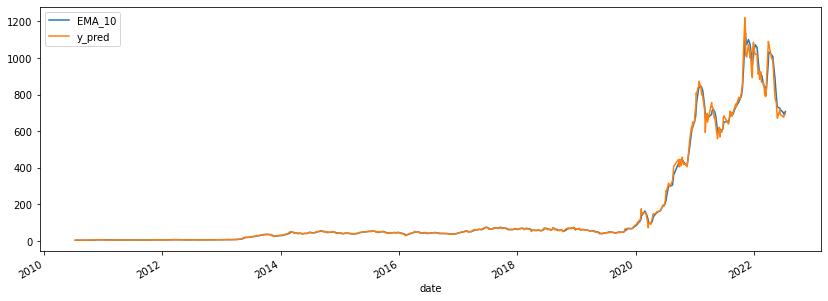

In [24]:
df_trend.plot(figsize=(14,5))

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

C:\Users\15125\AppData\Local\Temp/ipykernel_25800/3969865832.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=0).fit(X_train, y_train)


0.9992505745401579
0.9947062863300561


In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score
# Printout relevant metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
# print("Accuracy",accuracy_score(y_test,y_pred)) - not supported for continous data


Mean Absolute Error: 6.240351706438461
Coefficient of Determination: 0.9961490561187679


In [27]:
# Coefficient of Determination: 0.9925133513467957 close to 1, means the model is nearly perfectly fit
# Mean Absolute Error: 16.136803174699697 this value is high should be close to 0 for a best prediction
# Model Cofficients :[[0.99243097]] - X and Y are closely related -moving avergae does not have deviation from the actual values


In [28]:
predictions_reg = model.predict(X_test)
predictions_reg

array([  70.25456015,  946.30156214,   53.22901521,   43.72198445,
         44.40331125,   41.36622153,    4.206348  ,  564.33322156,
         45.01580633,   55.42743987,  647.23830173,   39.29729212,
         57.13653839,  407.80544726,  688.73367426,   43.10278083,
        595.80093582,   48.99578307,   48.65838525,   25.9980839 ,
         66.59163587,   45.01415542,  887.86201601,   23.70033057,
         43.04808428,    4.62442075,    6.66390475,  595.04844408,
        737.65173483,   73.62614949,  411.78800451, 1086.03766036,
          5.67974653, 1095.14837943,   39.124523  ,   40.72369623,
          5.67026824,    6.87486082,    6.19231659,   45.28636263,
          5.38855386,   68.90560625,   69.12731514,    5.78768108,
         58.42518682,   10.61843427,   65.82217178,   45.95460829,
         62.49027293,   51.05643704,  848.39501407, 1081.37029972,
         65.97163931,    4.81479579,   11.60157333,   34.8078546 ,
         69.01341064,   69.42937169,   16.04027799,  816.58084

In [29]:
dfpred_reg = pd.DataFrame(predictions_reg)
dfpred_reg.columns=["y_pred"]
dfpred_reg

,y_pred
0,70.254560
1,946.301562
2,53.229015
3,43.721984
4,44.403311
...,...
902,28.635854
903,36.199000
904,44.403311
905,42.232645


In [30]:
df_reg = y_test.copy()
df_reg["y_pred"]=y_pred
df_reg

,EMA_10,y_pred
date,,
2018-12-04,69.824190,71.530371
2022-01-24,1004.133508,922.739961
2014-11-14,49.356189,51.487669
2016-12-29,42.034644,42.757926
2015-02-20,42.079270,43.240046
...,...,...
2013-08-14,28.411466,27.814190
2013-10-04,36.393043,36.071734
2019-06-11,40.739389,43.238059


<AxesSubplot:xlabel='date'>

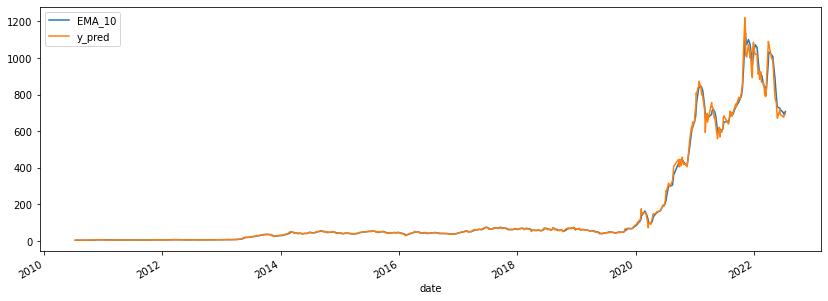

In [31]:
df_reg.plot(figsize=(14,5))

In [32]:
import string
#df_AdjustedClose["adjustedClose"][-1]
pred_last_value = df_trend.loc[df_trend.index == pd.to_datetime(df_trend.index.max())]["y_pred"]
df_forecast=[]
i=0
for i in range(0,100):
    if i == 0:

        df_forecast.append(0.96873381* df_AdjustedClose["adjustedClose"][-1] + 0.00158298)
        #df_forecast.append(model.predict(df_AdjustedClose["adjustedClose"][-1].reshape(-1,1)))
    else:
        #df_forecast.append(model.predict(df_forecast[i-1]))
        df_forecast.append(0.97316976*df_forecast[i-1]  + 0.00152851)
    i = i + 1    
print(df_forecast)

df_forecast = pd.DataFrame(df_forecast)

[677.3499715822438, 659.178037790699, 641.4936613440454, 624.283760961706, 607.5356063370008, 591.2368087204335, 575.3753117556302, 559.9393825611518, 544.9176030515843, 530.2988614914855, 516.0723442759421, 502.22752793165597, 488.75417133264295, 475.64230812478706, 462.8822393536451, 450.4645262900494, 438.3799834482011, 426.61967179108984, 415.1748921182137, 404.0371786307079, 393.19829266912313, 382.6502166192203, 372.38514798127466, 362.39549359850156, 352.67386404033533, 343.21306813640575, 334.00610765716965, 325.046172137262, 316.3266338377379, 307.8410428434793, 299.58312229213846, 291.54676373109106, 283.72602259896263, 276.11511382838705, 268.70840756674414, 261.5004250117106, 254.48583435854442, 247.65944685610444, 241.0162129686879, 234.5512186408469, 228.25968166242052, 222.1369481310942, 216.1784890098694, 210.37989677689725, 204.7368821651979, 199.24527098985394, 193.90100106033114, 188.70011917564221, 183.63877820013116, 178.71323421771487, 173.91984376247737, 169.2550

In [33]:
import datetime
end_date = pd.to_datetime('2022-06-20')

date_future = end_date + datetime.timedelta(139)

df_future_dates = pd.date_range(start=end_date, end=date_future,freq='B')
df_future_dates

DatetimeIndex(['2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01', '2022-07-04', '2022-07-05',
               '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-11',
               '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-05',
      

In [34]:
df_combine = pd.DataFrame(df_future_dates,df_forecast[0])
df_combine.columns=['date']
df_combine

,date
0,
677.349972,2022-06-20
659.178038,2022-06-21
641.493661,2022-06-22
624.283761,2022-06-23
607.535606,2022-06-24
...,...
51.189124,2022-10-31
49.817236,2022-11-01
48.482156,2022-11-02


In [35]:
df_combine_forecast = df_combine.reset_index()
df_combine_forecast = df_combine_forecast.set_index('date')
df_combine_forecast

,0
date,
2022-06-20,677.349972
2022-06-21,659.178038
2022-06-22,641.493661
2022-06-23,624.283761
2022-06-24,607.535606
...,...
2022-10-31,51.189124
2022-11-01,49.817236
2022-11-02,48.482156


In [36]:
dfpred = pd.DataFrame(y_pred)
dfpred.columns=["y_pred"]
dfpred

,y_pred
0,71.530371
1,922.739961
2,51.487669
3,42.757926
4,43.240046
...,...
902,27.814190
903,36.071734
904,43.238059
905,40.688577


In [37]:
df_trend = y_test.copy()
df_trend["y_pred"]=y_pred
df_trend

,EMA_10,y_pred
date,,
2018-12-04,69.824190,71.530371
2022-01-24,1004.133508,922.739961
2014-11-14,49.356189,51.487669
2016-12-29,42.034644,42.757926
2015-02-20,42.079270,43.240046
...,...,...
2013-08-14,28.411466,27.814190
2013-10-04,36.393043,36.071734
2019-06-11,40.739389,43.238059


<Figure size 1152x576 with 0 Axes>

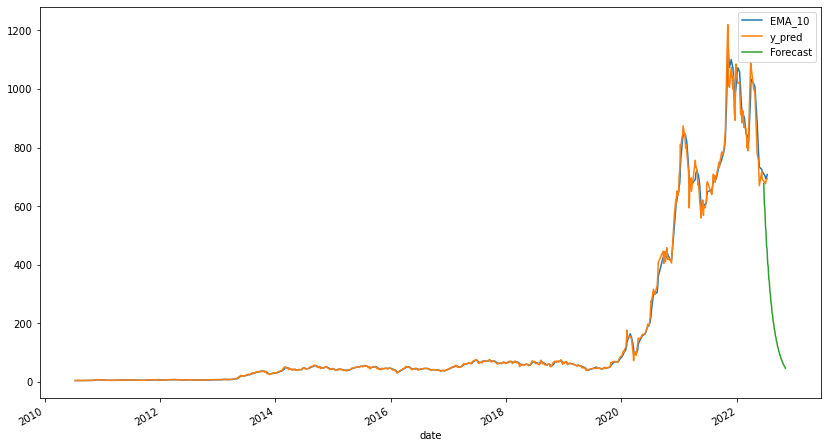

In [38]:
#plot the predictions for validation set
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
df_trend.plot(figsize=(14,8))
#plt.plot(df_trend)
#plt.plot(valid, label='Valid')

plt.plot(df_combine_forecast[0], label='Forecast')
plt.legend()
plt.show()